In [15]:
import numpy

# scipy.special for the sigmoid function expit()
import scipy.special

# library for plotting arrays
import matplotlib.pyplot
# ensure the plots are inside the notebook, not an external window
%matplotlib inline


In [16]:
# nerual network class definition
class nerualNetwork:
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih, who
        # weights inside the arrays are w_i_j,where linnk is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc
        # simple version
        # self.wih = (numpy.random.rand(self.hnodes, self.inodes) - 0.5)
        # self.who= (numpy.random.rand(self.onodes, self.hnodes) - 0.5)
        # Based upon distribution p133
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))    
        
        #learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        pass
    
        
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T ##WHAT IS THIS???
        targets = numpy.array(targets_list, ndmin=2).T ##WHAT IS THIS???
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calulate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs) 
        
        # error is the (target - actual)
        output_errors = targets - final_outputs
        
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        
        pass
    
    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T ##WHAT IS THIS???
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calulate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [25]:
# number of input, hidden, output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# learning rate
learning_rate = 0.3

# create instance of neural network
n = nerualNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# load the mnist training data csv file into a list
training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines() ## for large files better to read a line at a time
training_data_file.close()

# train the nerual network

# go through all records in the training set 
for record in training_data_list:
    # split the record by the ","commas
    all_values = record.split(',')
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:])/255.0 * 0.99) + 0.01
    # create the target output values (all 0.01, except the desired label which is 0.99)
    targets = numpy.zeros(output_nodes) + 0.01
    # all_values[0] is the target label for this record
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    pass


In [4]:
# load the mnist test data csv file into a list
test_data_file = open("mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [5]:
# get the first test record
all_values = test_data_list[0].split(',')
# print the label
print(all_values[0])


7


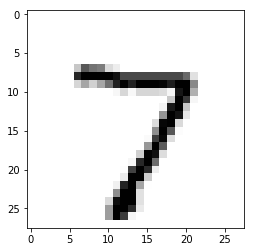

In [6]:
image_array = numpy.asfarray(all_values[1:]).reshape([28,28]) 
matplotlib.pyplot.imshow(image_array, cmap='Greys',interpolation='None')

In [7]:
n.query((numpy.asfarray(all_values[1:])/255.0 * 0.99) + 0.01)

array([[ 0.0192444 ],
       [ 0.00864986],
       [ 0.00763258],
       [ 0.08200239],
       [ 0.03850603],
       [ 0.00933585],
       [ 0.00550455],
       [ 0.92075933],
       [ 0.02052188],
       [ 0.02966259]])

In [26]:
# test the nerual network

# scorecard for how well the network performs, initially empty 
scorecard = []

# load the mnist test data csv file into a list
test_data_file = open("mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()


# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # print(correct_label, " Correct Label")
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    # print(label, "networks answer")
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answe, add 1 to scorecard
        scorecard.append(1)
    else:
        # networks answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    pass
    
    

7  Correct Label
7 networks answer
2  Correct Label
2 networks answer
1  Correct Label
1 networks answer
0  Correct Label
0 networks answer
4  Correct Label
4 networks answer
1  Correct Label
1 networks answer
4  Correct Label
4 networks answer
9  Correct Label
9 networks answer
5  Correct Label
9 networks answer
9  Correct Label
9 networks answer
0  Correct Label
0 networks answer
6  Correct Label
6 networks answer
9  Correct Label
9 networks answer
0  Correct Label
0 networks answer
1  Correct Label
1 networks answer
5  Correct Label
5 networks answer
9  Correct Label
9 networks answer
7  Correct Label
7 networks answer
3  Correct Label
3 networks answer
4  Correct Label
4 networks answer
9  Correct Label
9 networks answer
6  Correct Label
6 networks answer
6  Correct Label
6 networks answer
5  Correct Label
5 networks answer
4  Correct Label
4 networks answer
0  Correct Label
0 networks answer
7  Correct Label
7 networks answer
4  Correct Label
4 networks answer
0  Correct Label
0 n

4 networks answer
5  Correct Label
5 networks answer
9  Correct Label
9 networks answer
8  Correct Label
9 networks answer
8  Correct Label
8 networks answer
3  Correct Label
3 networks answer
7  Correct Label
7 networks answer
6  Correct Label
6 networks answer
0  Correct Label
0 networks answer
0  Correct Label
0 networks answer
3  Correct Label
3 networks answer
0  Correct Label
0 networks answer
2  Correct Label
2 networks answer
6  Correct Label
0 networks answer
6  Correct Label
6 networks answer
4  Correct Label
4 networks answer
9  Correct Label
9 networks answer
3  Correct Label
5 networks answer
3  Correct Label
3 networks answer
3  Correct Label
3 networks answer
2  Correct Label
2 networks answer
3  Correct Label
3 networks answer
9  Correct Label
9 networks answer
1  Correct Label
1 networks answer
2  Correct Label
2 networks answer
6  Correct Label
6 networks answer
8  Correct Label
8 networks answer
0  Correct Label
0 networks answer
5  Correct Label
5 networks answer
6 

1 networks answer
1  Correct Label
1 networks answer
4  Correct Label
4 networks answer
4  Correct Label
4 networks answer
3  Correct Label
3 networks answer
1  Correct Label
1 networks answer
0  Correct Label
0 networks answer
7  Correct Label
7 networks answer
7  Correct Label
7 networks answer
0  Correct Label
0 networks answer
7  Correct Label
7 networks answer
9  Correct Label
9 networks answer
4  Correct Label
9 networks answer
4  Correct Label
4 networks answer
8  Correct Label
8 networks answer
5  Correct Label
5 networks answer
5  Correct Label
5 networks answer
4  Correct Label
4 networks answer
0  Correct Label
0 networks answer
8  Correct Label
8 networks answer
2  Correct Label
2 networks answer
1  Correct Label
1 networks answer
0  Correct Label
6 networks answer
8  Correct Label
8 networks answer
4  Correct Label
4 networks answer
5  Correct Label
8 networks answer
0  Correct Label
0 networks answer
4  Correct Label
4 networks answer
0  Correct Label
0 networks answer
6 

1 networks answer
3  Correct Label
3 networks answer
7  Correct Label
7 networks answer
5  Correct Label
5 networks answer
4  Correct Label
4 networks answer
4  Correct Label
4 networks answer
1  Correct Label
1 networks answer
8  Correct Label
8 networks answer
1  Correct Label
1 networks answer
3  Correct Label
3 networks answer
8  Correct Label
8 networks answer
1  Correct Label
1 networks answer
2  Correct Label
2 networks answer
5  Correct Label
5 networks answer
8  Correct Label
3 networks answer
0  Correct Label
0 networks answer
6  Correct Label
6 networks answer
2  Correct Label
2 networks answer
1  Correct Label
1 networks answer
1  Correct Label
1 networks answer
7  Correct Label
9 networks answer
1  Correct Label
1 networks answer
5  Correct Label
5 networks answer
3  Correct Label
3 networks answer
4  Correct Label
4 networks answer
6  Correct Label
8 networks answer
9  Correct Label
9 networks answer
5  Correct Label
5 networks answer
0  Correct Label
0 networks answer
9 

8 networks answer
8  Correct Label
8 networks answer
7  Correct Label
1 networks answer
9  Correct Label
9 networks answer
7  Correct Label
9 networks answer
1  Correct Label
1 networks answer
4  Correct Label
4 networks answer
5  Correct Label
5 networks answer
6  Correct Label
6 networks answer
0  Correct Label
0 networks answer
5  Correct Label
5 networks answer
2  Correct Label
2 networks answer
2  Correct Label
2 networks answer
2  Correct Label
6 networks answer
1  Correct Label
1 networks answer
5  Correct Label
5 networks answer
5  Correct Label
5 networks answer
2  Correct Label
2 networks answer
4  Correct Label
4 networks answer
9  Correct Label
9 networks answer
6  Correct Label
6 networks answer
2  Correct Label
2 networks answer
7  Correct Label
7 networks answer
7  Correct Label
7 networks answer
2  Correct Label
2 networks answer
2  Correct Label
2 networks answer
1  Correct Label
1 networks answer
1  Correct Label
1 networks answer
2  Correct Label
2 networks answer
8 

5  Correct Label
5 networks answer
2  Correct Label
2 networks answer
9  Correct Label
9 networks answer
2  Correct Label
2 networks answer
1  Correct Label
1 networks answer
2  Correct Label
2 networks answer
1  Correct Label
1 networks answer
7  Correct Label
7 networks answer
3  Correct Label
3 networks answer
6  Correct Label
6 networks answer
8  Correct Label
8 networks answer
8  Correct Label
3 networks answer
4  Correct Label
4 networks answer
9  Correct Label
9 networks answer
1  Correct Label
1 networks answer
9  Correct Label
9 networks answer
8  Correct Label
3 networks answer
5  Correct Label
5 networks answer
7  Correct Label
7 networks answer
5  Correct Label
5 networks answer
1  Correct Label
1 networks answer
1  Correct Label
1 networks answer
8  Correct Label
8 networks answer
6  Correct Label
6 networks answer
5  Correct Label
5 networks answer
2  Correct Label
2 networks answer
4  Correct Label
4 networks answer
4  Correct Label
4 networks answer
3  Correct Label
7 n

7  Correct Label
9 networks answer
8  Correct Label
8 networks answer
6  Correct Label
6 networks answer
0  Correct Label
0 networks answer
1  Correct Label
1 networks answer
8  Correct Label
8 networks answer
2  Correct Label
2 networks answer
5  Correct Label
5 networks answer
7  Correct Label
7 networks answer
7  Correct Label
7 networks answer
6  Correct Label
6 networks answer
9  Correct Label
3 networks answer
3  Correct Label
3 networks answer
5  Correct Label
5 networks answer
8  Correct Label
2 networks answer
4  Correct Label
4 networks answer
2  Correct Label
2 networks answer
4  Correct Label
4 networks answer
0  Correct Label
0 networks answer
8  Correct Label
8 networks answer
8  Correct Label
8 networks answer
3  Correct Label
3 networks answer
4  Correct Label
4 networks answer
9  Correct Label
9 networks answer
2  Correct Label
2 networks answer
7  Correct Label
7 networks answer
5  Correct Label
5 networks answer
8  Correct Label
8 networks answer
6  Correct Label
6 n

4 networks answer
4  Correct Label
4 networks answer
8  Correct Label
3 networks answer
0  Correct Label
0 networks answer
4  Correct Label
4 networks answer
4  Correct Label
4 networks answer
5  Correct Label
5 networks answer
8  Correct Label
3 networks answer
0  Correct Label
0 networks answer
6  Correct Label
6 networks answer
8  Correct Label
8 networks answer
9  Correct Label
9 networks answer
8  Correct Label
8 networks answer
5  Correct Label
5 networks answer
6  Correct Label
5 networks answer
9  Correct Label
9 networks answer
0  Correct Label
0 networks answer
4  Correct Label
4 networks answer
8  Correct Label
8 networks answer
7  Correct Label
7 networks answer
1  Correct Label
1 networks answer
3  Correct Label
3 networks answer
4  Correct Label
4 networks answer
5  Correct Label
6 networks answer
8  Correct Label
8 networks answer
0  Correct Label
0 networks answer
9  Correct Label
9 networks answer
1  Correct Label
1 networks answer
3  Correct Label
3 networks answer
3 

0  Correct Label
0 networks answer
9  Correct Label
9 networks answer
1  Correct Label
1 networks answer
4  Correct Label
4 networks answer
0  Correct Label
0 networks answer
6  Correct Label
6 networks answer
3  Correct Label
3 networks answer
3  Correct Label
3 networks answer
6  Correct Label
6 networks answer
0  Correct Label
0 networks answer
4  Correct Label
4 networks answer
9  Correct Label
9 networks answer
7  Correct Label
7 networks answer
5  Correct Label
5 networks answer
1  Correct Label
1 networks answer
6  Correct Label
6 networks answer
8  Correct Label
8 networks answer
9  Correct Label
9 networks answer
5  Correct Label
5 networks answer
5  Correct Label
5 networks answer
7  Correct Label
7 networks answer
9  Correct Label
9 networks answer
3  Correct Label
3 networks answer
8  Correct Label
8 networks answer
3  Correct Label
3 networks answer
8  Correct Label
3 networks answer
1  Correct Label
1 networks answer
5  Correct Label
5 networks answer
3  Correct Label
3 n

0  Correct Label
0 networks answer
0  Correct Label
0 networks answer
6  Correct Label
6 networks answer
3  Correct Label
3 networks answer
5  Correct Label
5 networks answer
9  Correct Label
9 networks answer
3  Correct Label
7 networks answer
4  Correct Label
9 networks answer
5  Correct Label
5 networks answer
5  Correct Label
5 networks answer
8  Correct Label
8 networks answer
5  Correct Label
5 networks answer
3  Correct Label
3 networks answer
0  Correct Label
0 networks answer
4  Correct Label
0 networks answer
0  Correct Label
0 networks answer
2  Correct Label
3 networks answer
9  Correct Label
9 networks answer
6  Correct Label
6 networks answer
8  Correct Label
8 networks answer
2  Correct Label
2 networks answer
3  Correct Label
3 networks answer
1  Correct Label
1 networks answer
2  Correct Label
2 networks answer
1  Correct Label
1 networks answer
1  Correct Label
1 networks answer
5  Correct Label
5 networks answer
6  Correct Label
6 networks answer
9  Correct Label
9 n

6  Correct Label
6 networks answer
0  Correct Label
0 networks answer
6  Correct Label
6 networks answer
9  Correct Label
9 networks answer
2  Correct Label
2 networks answer
6  Correct Label
6 networks answer
2  Correct Label
2 networks answer
7  Correct Label
7 networks answer
1  Correct Label
1 networks answer
7  Correct Label
7 networks answer
9  Correct Label
9 networks answer
4  Correct Label
4 networks answer
0  Correct Label
0 networks answer
0  Correct Label
0 networks answer
3  Correct Label
3 networks answer
8  Correct Label
8 networks answer
2  Correct Label
2 networks answer
2  Correct Label
2 networks answer
3  Correct Label
3 networks answer
1  Correct Label
1 networks answer
6  Correct Label
6 networks answer
0  Correct Label
0 networks answer
5  Correct Label
5 networks answer
7  Correct Label
7 networks answer
7  Correct Label
7 networks answer
9  Correct Label
9 networks answer
2  Correct Label
2 networks answer
6  Correct Label
6 networks answer
7  Correct Label
7 n

0  Correct Label
0 networks answer
8  Correct Label
3 networks answer
8  Correct Label
8 networks answer
0  Correct Label
0 networks answer
3  Correct Label
3 networks answer
2  Correct Label
2 networks answer
7  Correct Label
7 networks answer
7  Correct Label
3 networks answer
2  Correct Label
3 networks answer
6  Correct Label
6 networks answer
4  Correct Label
4 networks answer
7  Correct Label
9 networks answer
5  Correct Label
5 networks answer
5  Correct Label
5 networks answer
5  Correct Label
5 networks answer
2  Correct Label
2 networks answer
9  Correct Label
9 networks answer
2  Correct Label
2 networks answer
8  Correct Label
8 networks answer
4  Correct Label
4 networks answer
6  Correct Label
6 networks answer
8  Correct Label
8 networks answer
6  Correct Label
6 networks answer
5  Correct Label
5 networks answer
0  Correct Label
0 networks answer
0  Correct Label
0 networks answer
8  Correct Label
8 networks answer
7  Correct Label
7 networks answer
6  Correct Label
6 n

4 networks answer
1  Correct Label
1 networks answer
8  Correct Label
8 networks answer
2  Correct Label
2 networks answer
4  Correct Label
4 networks answer
0  Correct Label
0 networks answer
5  Correct Label
5 networks answer
1  Correct Label
1 networks answer
0  Correct Label
0 networks answer
2  Correct Label
3 networks answer
2  Correct Label
2 networks answer
6  Correct Label
6 networks answer
4  Correct Label
4 networks answer
4  Correct Label
4 networks answer
3  Correct Label
3 networks answer
9  Correct Label
9 networks answer
6  Correct Label
6 networks answer
1  Correct Label
1 networks answer
6  Correct Label
6 networks answer
5  Correct Label
5 networks answer
7  Correct Label
7 networks answer
9  Correct Label
9 networks answer
2  Correct Label
2 networks answer
0  Correct Label
0 networks answer
2  Correct Label
2 networks answer
6  Correct Label
6 networks answer
0  Correct Label
0 networks answer
1  Correct Label
1 networks answer
4  Correct Label
4 networks answer
3 

2  Correct Label
1 networks answer
3  Correct Label
3 networks answer
6  Correct Label
6 networks answer
8  Correct Label
8 networks answer
9  Correct Label
9 networks answer
8  Correct Label
9 networks answer
5  Correct Label
5 networks answer
3  Correct Label
3 networks answer
8  Correct Label
8 networks answer
5  Correct Label
5 networks answer
4  Correct Label
4 networks answer
5  Correct Label
5 networks answer
2  Correct Label
2 networks answer
0  Correct Label
0 networks answer
5  Correct Label
5 networks answer
6  Correct Label
6 networks answer
3  Correct Label
3 networks answer
2  Correct Label
2 networks answer
8  Correct Label
8 networks answer
3  Correct Label
3 networks answer
9  Correct Label
9 networks answer
9  Correct Label
9 networks answer
5  Correct Label
3 networks answer
7  Correct Label
7 networks answer
9  Correct Label
9 networks answer
4  Correct Label
4 networks answer
6  Correct Label
6 networks answer
7  Correct Label
7 networks answer
1  Correct Label
1 n

5  Correct Label
5 networks answer
9  Correct Label
9 networks answer
7  Correct Label
7 networks answer
6  Correct Label
6 networks answer
9  Correct Label
9 networks answer
0  Correct Label
0 networks answer
3  Correct Label
3 networks answer
6  Correct Label
6 networks answer
3  Correct Label
3 networks answer
9  Correct Label
9 networks answer
8  Correct Label
3 networks answer
2  Correct Label
2 networks answer
2  Correct Label
1 networks answer
1  Correct Label
1 networks answer
2  Correct Label
2 networks answer
8  Correct Label
8 networks answer
6  Correct Label
6 networks answer
8  Correct Label
8 networks answer
5  Correct Label
5 networks answer
5  Correct Label
5 networks answer
3  Correct Label
3 networks answer
9  Correct Label
9 networks answer
4  Correct Label
4 networks answer
9  Correct Label
9 networks answer
2  Correct Label
2 networks answer
5  Correct Label
5 networks answer
1  Correct Label
1 networks answer
5  Correct Label
5 networks answer
1  Correct Label
1 n

1 networks answer
6  Correct Label
6 networks answer
7  Correct Label
7 networks answer
4  Correct Label
9 networks answer
7  Correct Label
7 networks answer
5  Correct Label
5 networks answer
9  Correct Label
9 networks answer
6  Correct Label
0 networks answer
8  Correct Label
8 networks answer
2  Correct Label
2 networks answer
1  Correct Label
1 networks answer
4  Correct Label
2 networks answer
4  Correct Label
4 networks answer
5  Correct Label
5 networks answer
7  Correct Label
9 networks answer
6  Correct Label
6 networks answer
1  Correct Label
1 networks answer
3  Correct Label
3 networks answer
2  Correct Label
2 networks answer
5  Correct Label
5 networks answer
9  Correct Label
9 networks answer
9  Correct Label
9 networks answer
3  Correct Label
3 networks answer
6  Correct Label
6 networks answer
1  Correct Label
1 networks answer
1  Correct Label
1 networks answer
4  Correct Label
4 networks answer
6  Correct Label
6 networks answer
9  Correct Label
9 networks answer
7 

0 networks answer
9  Correct Label
9 networks answer
3  Correct Label
3 networks answer
7  Correct Label
1 networks answer
6  Correct Label
5 networks answer
8  Correct Label
3 networks answer
9  Correct Label
9 networks answer
3  Correct Label
3 networks answer
4  Correct Label
4 networks answer
9  Correct Label
9 networks answer
5  Correct Label
5 networks answer
8  Correct Label
8 networks answer
9  Correct Label
9 networks answer
1  Correct Label
1 networks answer
2  Correct Label
2 networks answer
8  Correct Label
8 networks answer
8  Correct Label
8 networks answer
6  Correct Label
6 networks answer
8  Correct Label
3 networks answer
1  Correct Label
1 networks answer
3  Correct Label
3 networks answer
7  Correct Label
7 networks answer
9  Correct Label
9 networks answer
0  Correct Label
0 networks answer
1  Correct Label
1 networks answer
1  Correct Label
1 networks answer
4  Correct Label
9 networks answer
7  Correct Label
3 networks answer
0  Correct Label
0 networks answer
8 

4  Correct Label
4 networks answer
2  Correct Label
2 networks answer
1  Correct Label
1 networks answer
5  Correct Label
5 networks answer
4  Correct Label
4 networks answer
5  Correct Label
5 networks answer
5  Correct Label
5 networks answer
8  Correct Label
8 networks answer
6  Correct Label
6 networks answer
4  Correct Label
4 networks answer
4  Correct Label
4 networks answer
4  Correct Label
4 networks answer
1  Correct Label
1 networks answer
8  Correct Label
8 networks answer
7  Correct Label
7 networks answer
5  Correct Label
5 networks answer
5  Correct Label
5 networks answer
1  Correct Label
1 networks answer
8  Correct Label
8 networks answer
9  Correct Label
9 networks answer
1  Correct Label
1 networks answer
3  Correct Label
3 networks answer
6  Correct Label
6 networks answer
3  Correct Label
3 networks answer
3  Correct Label
3 networks answer
2  Correct Label
2 networks answer
2  Correct Label
2 networks answer
6  Correct Label
6 networks answer
9  Correct Label
9 n

0  Correct Label
0 networks answer
4  Correct Label
4 networks answer
5  Correct Label
5 networks answer
3  Correct Label
3 networks answer
9  Correct Label
9 networks answer
4  Correct Label
4 networks answer
2  Correct Label
2 networks answer
0  Correct Label
0 networks answer
5  Correct Label
5 networks answer
0  Correct Label
0 networks answer
1  Correct Label
1 networks answer
3  Correct Label
3 networks answer
2  Correct Label
2 networks answer
9  Correct Label
9 networks answer
1  Correct Label
8 networks answer
6  Correct Label
6 networks answer
0  Correct Label
0 networks answer
1  Correct Label
1 networks answer
1  Correct Label
1 networks answer
8  Correct Label
8 networks answer
0  Correct Label
0 networks answer
4  Correct Label
4 networks answer
7  Correct Label
7 networks answer
7  Correct Label
7 networks answer
6  Correct Label
6 networks answer
3  Correct Label
3 networks answer
6  Correct Label
6 networks answer
0  Correct Label
0 networks answer
7  Correct Label
7 n

2 networks answer
1  Correct Label
1 networks answer
2  Correct Label
2 networks answer
3  Correct Label
3 networks answer
8  Correct Label
8 networks answer
3  Correct Label
3 networks answer
2  Correct Label
2 networks answer
6  Correct Label
6 networks answer
5  Correct Label
5 networks answer
6  Correct Label
6 networks answer
8  Correct Label
8 networks answer
2  Correct Label
2 networks answer
7  Correct Label
7 networks answer
4  Correct Label
4 networks answer
8  Correct Label
8 networks answer
1  Correct Label
1 networks answer
8  Correct Label
8 networks answer
0  Correct Label
0 networks answer
5  Correct Label
5 networks answer
3  Correct Label
3 networks answer
9  Correct Label
9 networks answer
4  Correct Label
4 networks answer
1  Correct Label
1 networks answer
9  Correct Label
9 networks answer
2  Correct Label
2 networks answer
1  Correct Label
1 networks answer
9  Correct Label
9 networks answer
6  Correct Label
6 networks answer
7  Correct Label
7 networks answer
9 

1 networks answer
2  Correct Label
2 networks answer
3  Correct Label
3 networks answer
4  Correct Label
4 networks answer
5  Correct Label
5 networks answer
6  Correct Label
6 networks answer
7  Correct Label
7 networks answer
8  Correct Label
8 networks answer
9  Correct Label
3 networks answer
0  Correct Label
0 networks answer
1  Correct Label
1 networks answer
2  Correct Label
2 networks answer
3  Correct Label
3 networks answer
4  Correct Label
4 networks answer
5  Correct Label
5 networks answer
6  Correct Label
6 networks answer
7  Correct Label
7 networks answer
8  Correct Label
8 networks answer
9  Correct Label
3 networks answer
1  Correct Label
1 networks answer
2  Correct Label
8 networks answer
6  Correct Label
6 networks answer
5  Correct Label
5 networks answer
3  Correct Label
3 networks answer
0  Correct Label
0 networks answer
7  Correct Label
7 networks answer
0  Correct Label
0 networks answer
4  Correct Label
4 networks answer
1  Correct Label
1 networks answer
4 

2  Correct Label
2 networks answer
1  Correct Label
1 networks answer
9  Correct Label
9 networks answer
3  Correct Label
3 networks answer
9  Correct Label
9 networks answer
2  Correct Label
2 networks answer
0  Correct Label
0 networks answer
6  Correct Label
6 networks answer
0  Correct Label
0 networks answer
4  Correct Label
4 networks answer
0  Correct Label
0 networks answer
0  Correct Label
0 networks answer
1  Correct Label
1 networks answer
2  Correct Label
2 networks answer
3  Correct Label
3 networks answer
4  Correct Label
4 networks answer
7  Correct Label
4 networks answer
8  Correct Label
8 networks answer
9  Correct Label
9 networks answer
0  Correct Label
0 networks answer
1  Correct Label
1 networks answer
2  Correct Label
2 networks answer
3  Correct Label
3 networks answer
7  Correct Label
7 networks answer
8  Correct Label
8 networks answer
9  Correct Label
9 networks answer
0  Correct Label
0 networks answer
1  Correct Label
1 networks answer
2  Correct Label
2 n

4 networks answer
4  Correct Label
4 networks answer
0  Correct Label
0 networks answer
1  Correct Label
1 networks answer
2  Correct Label
2 networks answer
3  Correct Label
3 networks answer
4  Correct Label
4 networks answer
5  Correct Label
5 networks answer
6  Correct Label
6 networks answer
7  Correct Label
7 networks answer
8  Correct Label
8 networks answer
9  Correct Label
9 networks answer
0  Correct Label
0 networks answer
1  Correct Label
1 networks answer
2  Correct Label
2 networks answer
3  Correct Label
3 networks answer
4  Correct Label
4 networks answer
5  Correct Label
5 networks answer
6  Correct Label
6 networks answer
9  Correct Label
9 networks answer
0  Correct Label
0 networks answer
1  Correct Label
1 networks answer
2  Correct Label
2 networks answer
3  Correct Label
3 networks answer
4  Correct Label
4 networks answer
7  Correct Label
8 networks answer
8  Correct Label
8 networks answer
1  Correct Label
1 networks answer
3  Correct Label
3 networks answer
5 

0  Correct Label
0 networks answer
6  Correct Label
6 networks answer
6  Correct Label
6 networks answer
3  Correct Label
3 networks answer
7  Correct Label
7 networks answer
6  Correct Label
6 networks answer
9  Correct Label
9 networks answer
9  Correct Label
9 networks answer
4  Correct Label
4 networks answer
8  Correct Label
8 networks answer
4  Correct Label
4 networks answer
1  Correct Label
1 networks answer
0  Correct Label
0 networks answer
6  Correct Label
6 networks answer
6  Correct Label
6 networks answer
0  Correct Label
0 networks answer
1  Correct Label
1 networks answer
2  Correct Label
2 networks answer
3  Correct Label
3 networks answer
4  Correct Label
4 networks answer
5  Correct Label
5 networks answer
6  Correct Label
6 networks answer
7  Correct Label
7 networks answer
8  Correct Label
8 networks answer
9  Correct Label
9 networks answer
0  Correct Label
0 networks answer
1  Correct Label
1 networks answer
2  Correct Label
2 networks answer
3  Correct Label
3 n

3  Correct Label
3 networks answer
2  Correct Label
2 networks answer
2  Correct Label
2 networks answer
3  Correct Label
3 networks answer
0  Correct Label
0 networks answer
6  Correct Label
6 networks answer
4  Correct Label
4 networks answer
3  Correct Label
3 networks answer
7  Correct Label
7 networks answer
6  Correct Label
6 networks answer
9  Correct Label
9 networks answer
0  Correct Label
0 networks answer
4  Correct Label
9 networks answer
8  Correct Label
8 networks answer
1  Correct Label
1 networks answer
4  Correct Label
4 networks answer
0  Correct Label
0 networks answer
6  Correct Label
6 networks answer
1  Correct Label
1 networks answer
2  Correct Label
2 networks answer
6  Correct Label
6 networks answer
9  Correct Label
9 networks answer
2  Correct Label
2 networks answer
2  Correct Label
2 networks answer
3  Correct Label
3 networks answer
5  Correct Label
5 networks answer
5  Correct Label
5 networks answer
1  Correct Label
1 networks answer
0  Correct Label
0 n

5  Correct Label
5 networks answer
8  Correct Label
8 networks answer
1  Correct Label
1 networks answer
4  Correct Label
4 networks answer
8  Correct Label
8 networks answer
4  Correct Label
4 networks answer
1  Correct Label
1 networks answer
8  Correct Label
8 networks answer
6  Correct Label
6 networks answer
6  Correct Label
6 networks answer
4  Correct Label
4 networks answer
6  Correct Label
6 networks answer
0  Correct Label
0 networks answer
5  Correct Label
5 networks answer
5  Correct Label
5 networks answer
3  Correct Label
3 networks answer
3  Correct Label
3 networks answer
5  Correct Label
5 networks answer
7  Correct Label
7 networks answer
2  Correct Label
2 networks answer
5  Correct Label
5 networks answer
9  Correct Label
9 networks answer
6  Correct Label
6 networks answer
9  Correct Label
9 networks answer
2  Correct Label
2 networks answer
6  Correct Label
6 networks answer
2  Correct Label
2 networks answer
1  Correct Label
1 networks answer
2  Correct Label
2 n

8 networks answer
6  Correct Label
6 networks answer
0  Correct Label
0 networks answer
7  Correct Label
7 networks answer
2  Correct Label
9 networks answer
4  Correct Label
4 networks answer
1  Correct Label
1 networks answer
7  Correct Label
7 networks answer
0  Correct Label
0 networks answer
6  Correct Label
6 networks answer
7  Correct Label
9 networks answer
1  Correct Label
1 networks answer
2  Correct Label
4 networks answer
5  Correct Label
5 networks answer
8  Correct Label
8 networks answer
1  Correct Label
1 networks answer
8  Correct Label
8 networks answer
2  Correct Label
2 networks answer
8  Correct Label
8 networks answer
7  Correct Label
7 networks answer
6  Correct Label
6 networks answer
8  Correct Label
8 networks answer
7  Correct Label
7 networks answer
1  Correct Label
1 networks answer
6  Correct Label
6 networks answer
2  Correct Label
2 networks answer
9  Correct Label
9 networks answer
3  Correct Label
3 networks answer
0  Correct Label
0 networks answer
1 

6  Correct Label
6 networks answer
5  Correct Label
5 networks answer
4  Correct Label
4 networks answer
0  Correct Label
0 networks answer
0  Correct Label
0 networks answer
6  Correct Label
6 networks answer
6  Correct Label
6 networks answer
2  Correct Label
2 networks answer
0  Correct Label
0 networks answer
6  Correct Label
6 networks answer
3  Correct Label
3 networks answer
7  Correct Label
7 networks answer
7  Correct Label
7 networks answer
4  Correct Label
4 networks answer
4  Correct Label
4 networks answer
3  Correct Label
3 networks answer
9  Correct Label
9 networks answer
2  Correct Label
2 networks answer
8  Correct Label
8 networks answer
9  Correct Label
9 networks answer
6  Correct Label
6 networks answer
0  Correct Label
0 networks answer
9  Correct Label
9 networks answer
5  Correct Label
5 networks answer
3  Correct Label
3 networks answer
8  Correct Label
8 networks answer
8  Correct Label
8 networks answer
7  Correct Label
7 networks answer
1  Correct Label
1 n

3  Correct Label
3 networks answer
4  Correct Label
4 networks answer
5  Correct Label
5 networks answer
6  Correct Label
6 networks answer
7  Correct Label
7 networks answer
8  Correct Label
8 networks answer
9  Correct Label
9 networks answer
0  Correct Label
0 networks answer
1  Correct Label
1 networks answer
2  Correct Label
2 networks answer
3  Correct Label
3 networks answer
4  Correct Label
4 networks answer
5  Correct Label
5 networks answer
6  Correct Label
6 networks answer
7  Correct Label
7 networks answer
8  Correct Label
8 networks answer
9  Correct Label
9 networks answer
6  Correct Label
6 networks answer
9  Correct Label
9 networks answer
7  Correct Label
7 networks answer
0  Correct Label
0 networks answer
2  Correct Label
2 networks answer
3  Correct Label
3 networks answer
4  Correct Label
4 networks answer
3  Correct Label
3 networks answer
8  Correct Label
8 networks answer
5  Correct Label
5 networks answer
1  Correct Label
1 networks answer
3  Correct Label
3 n

2  Correct Label
2 networks answer
3  Correct Label
3 networks answer
4  Correct Label
4 networks answer
5  Correct Label
5 networks answer
6  Correct Label
6 networks answer
7  Correct Label
7 networks answer
8  Correct Label
8 networks answer
9  Correct Label
9 networks answer
6  Correct Label
6 networks answer
4  Correct Label
4 networks answer
2  Correct Label
2 networks answer
6  Correct Label
6 networks answer
4  Correct Label
4 networks answer
7  Correct Label
7 networks answer
5  Correct Label
5 networks answer
5  Correct Label
5 networks answer
4  Correct Label
4 networks answer
7  Correct Label
7 networks answer
2  Correct Label
2 networks answer
9  Correct Label
9 networks answer
3  Correct Label
3 networks answer
9  Correct Label
9 networks answer
3  Correct Label
3 networks answer
8  Correct Label
8 networks answer
2  Correct Label
2 networks answer
0  Correct Label
0 networks answer
9  Correct Label
9 networks answer
5  Correct Label
5 networks answer
6  Correct Label
6 n

2 networks answer
8  Correct Label
8 networks answer
0  Correct Label
0 networks answer
6  Correct Label
6 networks answer
8  Correct Label
8 networks answer
1  Correct Label
1 networks answer
7  Correct Label
7 networks answer
9  Correct Label
9 networks answer
1  Correct Label
1 networks answer
9  Correct Label
9 networks answer
2  Correct Label
2 networks answer
6  Correct Label
6 networks answer
7  Correct Label
7 networks answer
6  Correct Label
6 networks answer
6  Correct Label
6 networks answer
8  Correct Label
8 networks answer
7  Correct Label
7 networks answer
4  Correct Label
4 networks answer
9  Correct Label
9 networks answer
2  Correct Label
2 networks answer
1  Correct Label
1 networks answer
3  Correct Label
3 networks answer
3  Correct Label
3 networks answer
0  Correct Label
0 networks answer
5  Correct Label
5 networks answer
5  Correct Label
5 networks answer
8  Correct Label
8 networks answer
0  Correct Label
0 networks answer
3  Correct Label
3 networks answer
7 

1  Correct Label
1 networks answer
1  Correct Label
1 networks answer
3  Correct Label
3 networks answer
2  Correct Label
2 networks answer
7  Correct Label
7 networks answer
7  Correct Label
7 networks answer
8  Correct Label
8 networks answer
8  Correct Label
8 networks answer
7  Correct Label
7 networks answer
8  Correct Label
8 networks answer
4  Correct Label
4 networks answer
6  Correct Label
6 networks answer
0  Correct Label
0 networks answer
2  Correct Label
2 networks answer
0  Correct Label
0 networks answer
7  Correct Label
7 networks answer
0  Correct Label
0 networks answer
3  Correct Label
3 networks answer
6  Correct Label
6 networks answer
8  Correct Label
8 networks answer
7  Correct Label
9 networks answer
1  Correct Label
1 networks answer
5  Correct Label
5 networks answer
9  Correct Label
9 networks answer
9  Correct Label
9 networks answer
3  Correct Label
3 networks answer
7  Correct Label
7 networks answer
2  Correct Label
2 networks answer
4  Correct Label
4 n

6  Correct Label
6 networks answer
2  Correct Label
0 networks answer
8  Correct Label
8 networks answer
7  Correct Label
7 networks answer
6  Correct Label
6 networks answer
4  Correct Label
4 networks answer
9  Correct Label
9 networks answer
9  Correct Label
9 networks answer
5  Correct Label
5 networks answer
3  Correct Label
3 networks answer
7  Correct Label
7 networks answer
4  Correct Label
4 networks answer
3  Correct Label
3 networks answer
0  Correct Label
0 networks answer
4  Correct Label
4 networks answer
6  Correct Label
6 networks answer
6  Correct Label
6 networks answer
1  Correct Label
1 networks answer
1  Correct Label
1 networks answer
3  Correct Label
3 networks answer
2  Correct Label
2 networks answer
1  Correct Label
1 networks answer
0  Correct Label
0 networks answer
0  Correct Label
0 networks answer
1  Correct Label
1 networks answer
2  Correct Label
2 networks answer
3  Correct Label
3 networks answer
4  Correct Label
4 networks answer
7  Correct Label
7 n

In [27]:
# calculate the performance score, the function of correct answers
scorecard_array = numpy.asarray(scorecard)
print("Performance = ", scorecard_array.sum() / scorecard_array.size)

Performance =  0.9362
